In [1]:
# ==================================================================================
# Diplomado en Estadística Aplicada a la Toma de Decisiones con Lenguaje R y Python
# Universidad Privada Boliviana
# ----------------------------------------------------------------------------------
#   MODELOS PREDICTIVOS PARA LA TOMA DE DECISIONES ESTRATEGICAS
# ----------------------------------------------------------------------------------
#         Enrique Alejandro Laurel Cossio, Mayo 2025
# ==================================================================================
#                      REGRESIÓN LOGÍSTICA
# ==================================================================================

In [2]:
# Cargamos Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
# cargamos datos
url='https://raw.githubusercontent.com/ealaurel/MODELOS_PREDICTIVOS_202505/main/data/ifood_df.csv'
ifood_df = pd.read_csv(url,sep=',', encoding='iso-8859-1')

print(ifood_df.shape) #
ifood_df.head(2)

(2205, 39)


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0


# 1. Exploración de Datos

In [ ]:
ifood_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

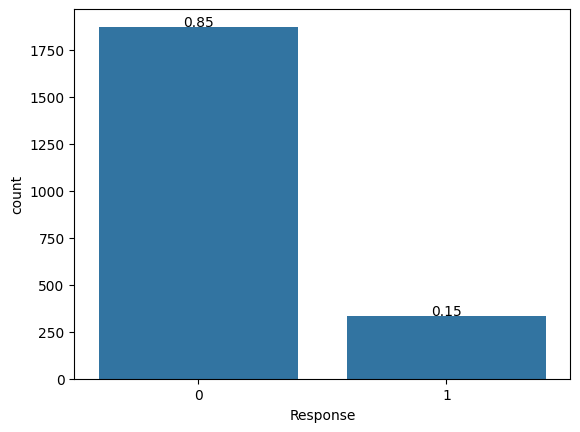

In [ ]:
ax = sns.countplot(x='Response', data=ifood_df)
total = float(len(ifood_df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.show()

In [ ]:
# una copia a los datos
df = ifood_df.copy()

In [ ]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [ ]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


# 2. Entrenamiento del Modelo

In [ ]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [ ]:
df.Response.unique()

array([1, 0])

In [ ]:
# seleccionamos variables explicativas y variables dependiente
X = df[['Kidhome','Recency','education_Basic','Complain']]
y = df['Response']

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)

In [ ]:
# Ajusta el modelo de regresión logística
modelo_logit = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.397029
         Iterations 7


# 3. Resultados del Modelo

In [ ]:
# Muestra un resumen del modelo
print(modelo_logit.summary())

                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1764
Model:                          Logit   Df Residuals:                     1760
Method:                           MLE   Df Model:                            3
Date:                Sat, 21 Sep 2024   Pseudo R-squ.:                 0.03667
Time:                        01:12:36   Log-Likelihood:                -700.36
converged:                       True   LL-Null:                       -727.02
Covariance Type:            nonrobust   LLR p-value:                 1.565e-11
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Kidhome            -0.6746      0.126     -5.347      0.000      -0.922      -0.427
Recency            -0.0319      0.002    -18.034      0.000      -0.035      -0.028
education_Basic    -1.4569      

In [ ]:
# prediccion
y_pred_train = modelo_logit.predict(X_train)
y_pred_train.head(2)

,0
415,0.043164
1609,0.159956


In [ ]:
X_train.shape

(1764, 4)

In [ ]:
# Calcula la precisión del modelo en el entrenamiento
# y_train: valores verdadaderos
# y_pred: valores predichos
precision_train = accuracy_score(y_train, (y_pred_train>0.5).astype(int))
print("Precisión del modelo:", precision_train)

Precisión del modelo: 0.8560090702947846


# 4. Predicción

In [ ]:
# Realiza predicciones en el conjunto de datos de prueba
y_pred = modelo_logit.predict(X_test)
y_pred

,0
48,0.083407
193,0.029847
1824,0.152781
2038,0.218264
380,0.091019
...,...
549,0.072317
660,0.352970
1361,0.428724
480,0.066155


In [ ]:
precision_test = accuracy_score(y_test, (y_pred>0.5).astype(int))
print("Precisión del modelo:", precision_test)

Precisión del modelo: 0.8208616780045351
